<a href="https://colab.research.google.com/github/JYKnomad/JYKnomad/blob/main/20220322_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import numpy as np
import imageio
from scipy import ndimage
from glob import glob 
import os
import os.path   
from pandas.core.common import flatten

SAMPLE = 1000

dir_path = "/content/drive/MyDrive/train_set/" 

train_im_paths = []
train_msk_paths = []

for i in range(3):
  train_path = sorted(glob(dir_path+ 'train%02d/' %int(i) +'image/*.jpg'))
  train_im_paths.append(train_path)
  mask_paths = sorted(glob(dir_path+ 'train%02d/' %int(i) +'mask/*.png'))
  train_msk_paths.append(mask_paths)

train_img_paths  = list(flatten(train_im_paths))
train_mask_paths  = list(flatten(train_msk_paths))

train_imgs = np.array([cv2.resize(cv2.imread(path, cv2.IMREAD_UNCHANGED), (512,512))
                        for path in train_img_paths])

temp = np.array([cv2.resize(cv2.imread(path, cv2.IMREAD_UNCHANGED), (512,512))
                        for path in train_mask_paths])

In [6]:
#from skimage.measure import compare_ssim as ssim # deprecated (old version)
from skimage.metrics import structural_similarity as ssim 
import argparse
import imutils
import cv2
from skimage import io


In [12]:
np.unique(temp)

array([  3,  15,  33, 255], dtype=uint8)

In [25]:
temp1= temp
temp1[temp1==255] = 0.
temp1[temp1==15] = 0.
temp1[temp1==3] = 0.
temp1[temp1==33] = 1.

score_idx1 = []
for i in range(306):
  grayA = cv2.cvtColor(temp1[i], cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(temp1[i+1], cv2.COLOR_RGB2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx1.append(score)
  # print('SSIM : {}'.format(score))

score_idx1_1 = []
for i in range(307,575,1):
  grayA = cv2.cvtColor(temp1[i], cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(temp1[i+1], cv2.COLOR_RGB2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx1_1.append(score)
  # print('SSIM : {}'.format(score))
# diff가 어떻게 되는지 볼 수 있습니다.


# 6. You can print only the score if you want

In [26]:
temp2= temp
temp2[temp2==255] = 0.
temp2[temp2==15] = 0.
temp2[temp2==3] = 0.
temp2[temp2==33] = 255.

score_idx2 = []
for i in range(306):
  grayA = cv2.cvtColor(temp2[i], cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(temp2[i+1], cv2.COLOR_RGB2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx2.append(score)
  # print('SSIM : {}'.format(score))

score_idx2_1 = []
for i in range(307,575,1):
  grayA = cv2.cvtColor(temp2[i], cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(temp2[i+1], cv2.COLOR_RGB2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx2_1.append(score)

In [27]:
temp3= temp
temp3[temp3==255] = 254.
temp3[temp3==15] = 254.
temp3[temp3==3] = 254.
temp3[temp3==33] = 255.

score_idx3 = []
for i in range(306):
  grayA = cv2.cvtColor(temp3[i], cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(temp3[i+1], cv2.COLOR_RGB2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx3.append(score)

score_idx3_1 = []
for i in range(307,575,1):
  grayA = cv2.cvtColor(temp3[i], cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(temp3[i+1], cv2.COLOR_RGB2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx3_1.append(score)

In [28]:
print(np.min(score_idx1),np.min(score_idx2),np.min(score_idx3),np.min(score_idx1_1),np.min(score_idx2_1),np.min(score_idx3_1))

0.998959509527708 0.998959509527708 0.998959509527708 0.9992575606966424 0.9992575606966424 0.9992575606966424


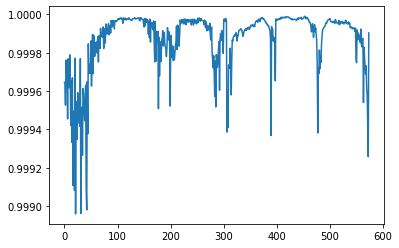

In [29]:
import matplotlib.pyplot as plt

score_idx_1=score_idx1+score_idx1_1
x = range(0, 574)
plt.plot(x,score_idx_1)

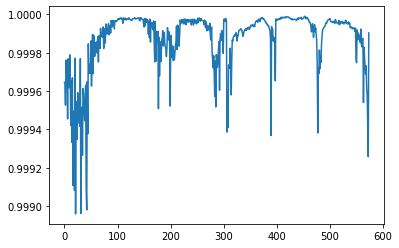

In [30]:
import matplotlib.pyplot as plt

score_idx_2=score_idx2+score_idx2_1
x = range(0, 574)
plt.plot(x,score_idx_2)

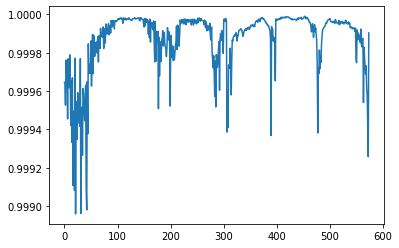

In [31]:
import matplotlib.pyplot as plt

score_idx_3=score_idx3+score_idx3_1
x = range(0, 574)
plt.plot(x,score_idx_3)